## Import libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import numpy as np
from config import (dta_dir,
                    derived_dir,
                    covar_dict, 
                    covar_order)

from figure_functions import (map_cluster_numbers, 
                              process_plot_data,
                              forest_plot,
                              forest_plot_row,
                              forest_plot_grid,
                             )

## Import and preprocess results 

In [3]:
dta = pd.read_csv(dta_dir + 'llc_0028_l12_mlr_complete_results.csv', index_col=0)
dta['category'] = ['l12' for i in range(dta.shape[0])]

In [4]:
dta2 = pd.read_csv(dta_dir + 'llc_0028_g12_mlr_complete_results.csv', index_col=0)
dta2['category'] = ['g12' for i in range(dta2.shape[0])]

In [5]:
dta3 = pd.read_csv(dta_dir + 'llc_0028_no_mlr_complete_results.csv', index_col=0)
dta3['category'] = ['no' for i in range(dta3.shape[0])]

In [6]:
dta = pd.concat([dta,dta2,dta3])

In [7]:
dta['[0.025'] = [float(v.split(' ')[0][1:])for v in dta.CI.values]
dta['0.975]'] = [float(v.split(' ')[-1][:-1]) for v in dta.CI.values]

In [8]:
dta['covar'] = [v + '_' + str(dta.index.values[i]) for i,v in enumerate(dta.variable.values)]

In [9]:
dta['covar'] = dta.covar.map(covar_dict)

### No covid 

In [10]:
no = dta.loc[dta.category=='no']

In [11]:
#rename cluster to match prevalence plots
symptoms = pd.read_csv(derived_dir + 'llc_0028_complete_c_lca_4class_0_prev_data_v2_processed.csv', index_col=0)

no = map_cluster_numbers(symptoms.T, no)

### Covid < 12 weeks ago 

In [12]:
l12 = dta.loc[dta.category=='l12']

In [13]:
#rename cluster to match prevalence plots
symptoms = pd.read_csv(derived_dir + 'llc_0028_complete_c_lca_4class_1_prev_data_v2_processed.csv', index_col=0)

l12 = map_cluster_numbers(symptoms.T, l12)

### Covid $\geq$ 12 weeks ago 

In [14]:
g12 = dta.loc[dta.category=='g12']

In [15]:
#rename cluster to match prevalence plots
symptoms = pd.read_csv(derived_dir + 'llc_0028_complete_c_lca_4class_2_prev_data_v2_processed.csv', index_col=0)

g12 = map_cluster_numbers(symptoms.T, g12)

## Plot

In [16]:
%pdb

Automatic pdb calling has been turned ON


In [17]:
rowtitles = ['No history of COVID-19',
            'Recent COVID-19 (< 12 weeks)',
            'Past COVID-19 ($\geq$ 12 weeks)']

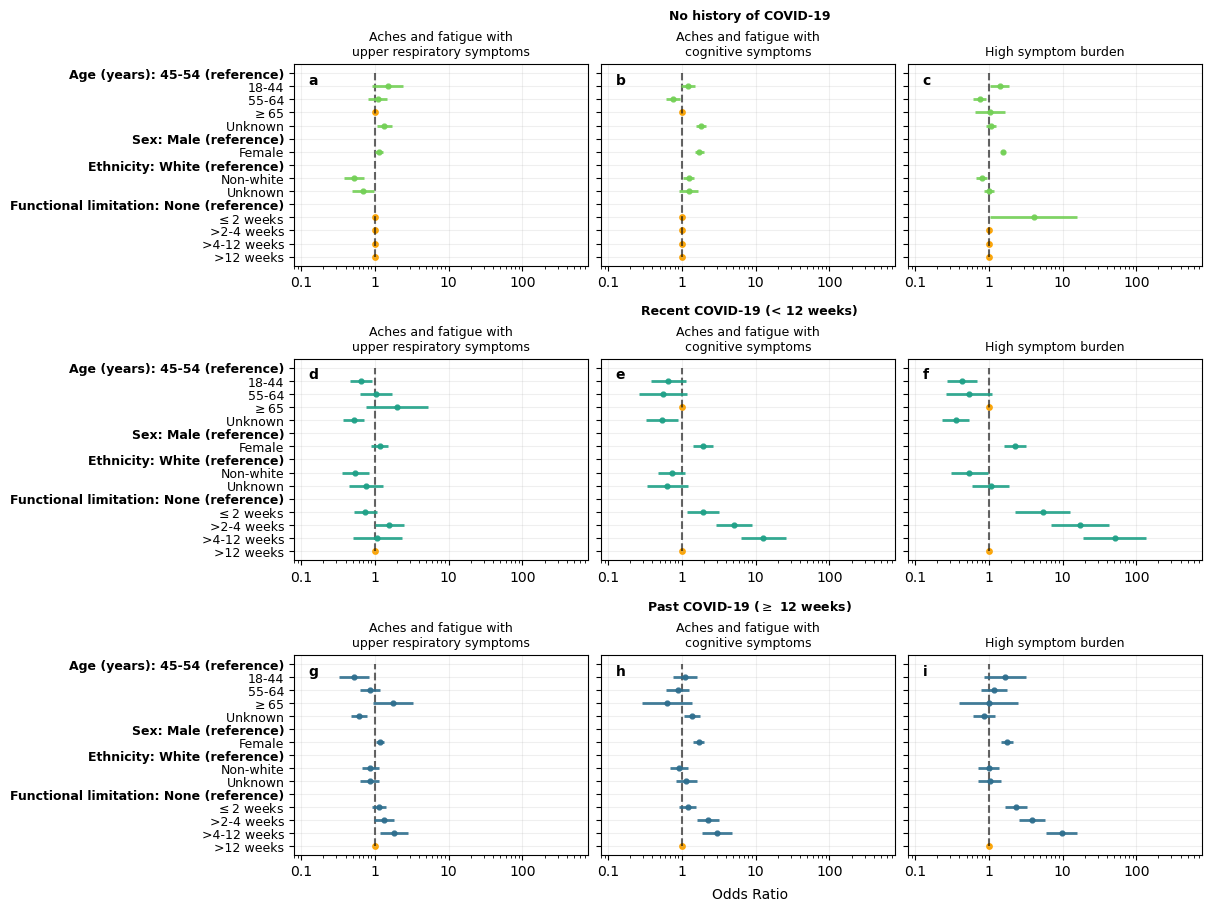

In [18]:
forest_plot_grid([no,l12,g12], rowtitles,
                figtitle = 'lca_mnlogit_all_categories')